In [1]:
import nltk

In [ ]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        C:\Users\Jagdeesh\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


In [2]:
import pandas as pd

In [3]:
messages = pd.read_excel('spam_or_not_spam.xlsx', names=["message", "label"])
messages.head()
messages["message"].fillna("No message",inplace=True)
messages["label"].fillna("No message",inplace=True)
messages.head()

,message,label
0,No message,No message
1,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,ham
2,martin a posted tassos papadopoulos the greek ...,ham
3,man threatens explosion in moscow thursday aug...,ham
4,klez the virus that won t die already the most...,ham


In [4]:
messages.describe()

,message,label
count,3017,3017
unique,2889,3
top,url URL date not supplied URL,ham
freq,10,2500


In [5]:
messages.groupby('label').describe()

message                                                            \
             count unique                                                top   
label                                                                          
No message      17     17   a world where some live in comfort and plenty...   
ham           2500   2445                     url URL date not supplied URL    
spam           500    428  lowest rates available for term life insurance...   

                 
           freq  
label            
No message    1  
ham          10  
spam          5

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
messages['length'] = messages['message'].apply(len)
messages.head()

,message,label,length
0,No message,No message,10
1,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,ham,1522
2,martin a posted tassos papadopoulos the greek ...,ham,643
3,man threatens explosion in moscow thursday aug...,ham,1509
4,klez the virus that won t die already the most...,ham,1015


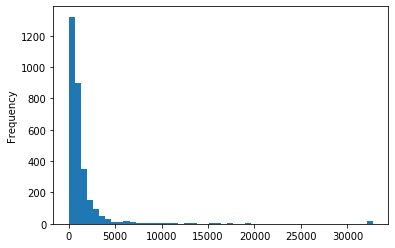

In [8]:
messages['length'].plot(bins=50, kind='hist') 

In [9]:
import string


In [10]:
from nltk.corpus import stopwords

In [11]:
messages.head()


,message,label,length
0,No message,No message,10
1,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,ham,1522
2,martin a posted tassos papadopoulos the greek ...,ham,643
3,man threatens explosion in moscow thursday aug...,ham,1509
4,klez the virus that won t die already the most...,ham,1015


In [12]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [13]:
messages['message'].head(5).apply(text_process)

0                                            [message]
1    [date, wed, NUMBER, aug, NUMBER, NUMBER, NUMBE...
2    [martin, posted, tassos, papadopoulos, greek, ...
3    [man, threatens, explosion, moscow, thursday, ...
4    [klez, virus, die, already, prolific, virus, e...
Name: message, dtype: object

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])
print(len(bow_transformer.vocabulary_))

33818


In [16]:
message4 = messages['message'][3]
print(message4)

man threatens explosion in moscow thursday august NUMBER NUMBER NUMBER NUMBER pm moscow ap security officers on thursday seized an unidentified man who said he was armed with explosives and threatened to blow up his truck in front of russia s federal security services headquarters in moscow ntv television reported the officers seized an automatic rifle the man was carrying then the man got out of the truck and was taken into custody ntv said no other details were immediately available the man had demanded talks with high government officials the interfax and itar tass news agencies said ekho moskvy radio reported that he wanted to talk with russian president vladimir putin police and security forces rushed to the security service building within blocks of the kremlin red square and the bolshoi ballet and surrounded the man who claimed to have one and a half tons of explosives the news agencies said negotiations continued for about one and a half hours outside the building itar tass and

In [17]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 3)	5
  (0, 1057)	3
  (0, 1730)	2
  (0, 2443)	1
  (0, 2491)	1
  (0, 2671)	1
  (0, 2957)	1
  (0, 3025)	1
  (0, 3061)	1
  (0, 3088)	1
  (0, 3116)	1
  (0, 3170)	1
  (0, 3369)	1
  (0, 4105)	1
  (0, 4138)	1
  (0, 4247)	1
  (0, 4713)	3
  (0, 5205)	1
  (0, 5788)	1
  (0, 5831)	1
  (0, 6783)	1
  (0, 7413)	1
  (0, 8000)	1
  (0, 8226)	1
  (0, 9166)	2
  :	:
  (0, 26198)	2
  (0, 26200)	2
  (0, 27405)	1
  (0, 27474)	1
  (0, 27862)	1
  (0, 27997)	1
  (0, 28299)	1
  (0, 28611)	1
  (0, 28633)	1
  (0, 28638)	1
  (0, 28691)	2
  (0, 28850)	1
  (0, 29143)	1
  (0, 29145)	1
  (0, 29191)	2
  (0, 29446)	1
  (0, 29855)	2
  (0, 30451)	1
  (0, 30632)	2
  (0, 30797)	1
  (0, 31368)	1
  (0, 31607)	1
  (0, 32170)	1
  (0, 32177)	1
  (0, 32699)	2
(1, 33818)


In [18]:
messages_bow = bow_transformer.transform(messages['message'])

In [19]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (3017, 33818)
Amount of Non-Zero occurences:  268563


In [20]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 32699)	0.07998389830714715
  (0, 32177)	0.06953421261152597
  (0, 32170)	0.04099764801069067
  (0, 31607)	0.04642426674730604
  (0, 31368)	0.08201114833354595
  (0, 30797)	0.024972692336902334
  (0, 30632)	0.07490863240165418
  (0, 30451)	0.08201114833354595
  (0, 29855)	0.12807047816477557
  (0, 29446)	0.0653323219432232
  (0, 29191)	0.10299504464201319
  (0, 29145)	0.07482796879105807
  (0, 29143)	0.07184667991687296
  (0, 28850)	0.059632116120288015
  (0, 28691)	0.17242607800369741
  (0, 28638)	0.06344289858026744
  (0, 28633)	0.03848902713622747
  (0, 28611)	0.04785593770117406
  (0, 28299)	0.07902985945936084
  (0, 27997)	0.031410000606148424
  (0, 27862)	0.04631342999554668
  (0, 27474)	0.06288259253179723
  (0, 27405)	0.045569090031876036
  (0, 26200)	0.08481955938818385
  (0, 26198)	0.07750279812332503
  :	:
  (0, 9166)	0.1352895784971404
  (0, 8226)	0.04879260015831823
  (0, 8000)	0.07323048409970975
  (0, 7413)	0.07323048409970975
  (0, 6783)	0.06466350037438508
  (0, 5

In [21]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(3017, 33818)


In [22]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)


print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

2413 604 3017


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), ('tfidf', TfidfTransformer()), ('classifier', MultinomialNB())])


In [24]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001B0B925B828>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [25]:
predictions = pipeline.predict(msg_test)

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [27]:
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))

              precision    recall  f1-score   support

  No message       0.00      0.00      0.00         0
         ham       1.00      0.83      0.91       568
        spam       0.28      1.00      0.44        36

    accuracy                           0.84       604
   macro avg       0.43      0.61      0.45       604
weighted avg       0.96      0.84      0.88       604

[[  0   0   0]
 [  5 471  92]
 [  0   0  36]]


D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [89]:
message5 = ['help wanted we are a NUMBER year old fortune NUMBER company that is growing at a tremendous rate we are looking for individuals who want to work from home this is an opportunity to make an excellent income no experience is required we will train you so if you are looking to be employed from home with a career that has vast opportunities then go URL we are looking for energetic and self motivated people if that is you than click on the link and fill out the form and one of our employement specialist will contact you to be removed from our link simple go to URL']

In [90]:
predict = pipeline.predict(message5)
print(predict)

['spam']
